# **🚢 Titanic Dataset Analysis**

This notebook analyzes the Titanic dataset using exploratory data analysis and predictive modeling

## **📚 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid')

## **📥 Load the Dataset**


In [2]:
data=pd.read_csv(r"Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **🧾 Data Overview**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **🔍 Checking Missing Values**

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **⚰️ Survival Distribution**

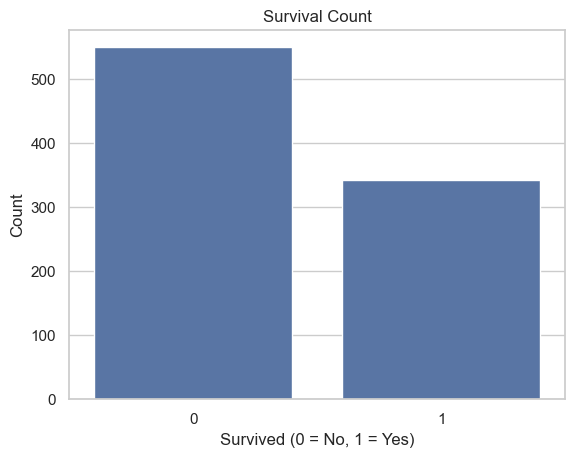

In [6]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## **👨‍👩‍👧‍👦 Gender vs Survival**

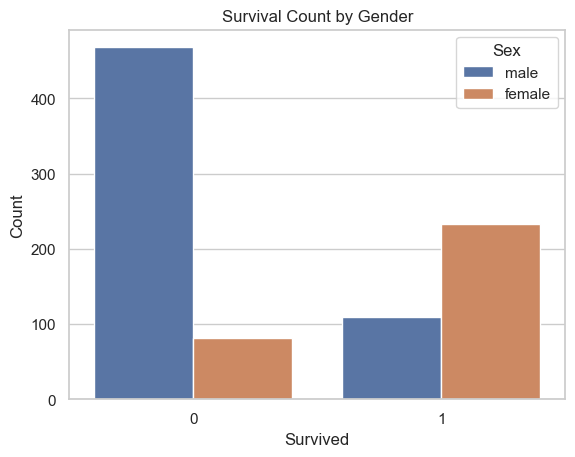

In [7]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

## **🛳️ Class vs Survival**

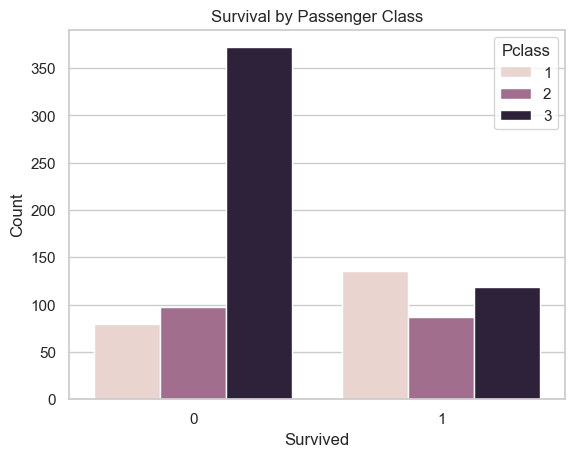

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

## **Correlation between the columns**

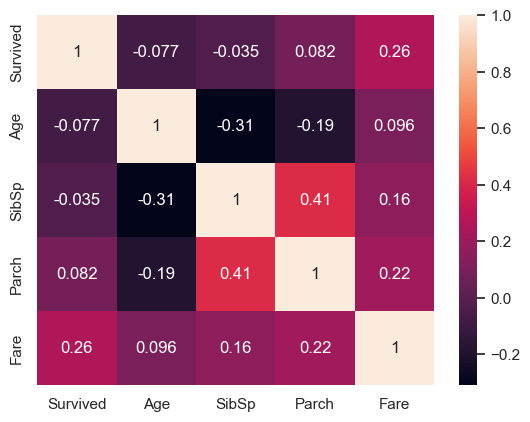

In [9]:
corr=data[['Survived','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(corr,annot=True)
plt.show()

## **🧹 Data Preprocessing for Model**

### **Filling missing Age with median and drop irrelevant features**


In [10]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
data.dropna(inplace=True)

C:\Users\Vidhi\AppData\Local\Temp\ipykernel_19744\428667088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


### **Encoding the data**

In [11]:
data['Sex']=data['Sex'].astype('category')
data['Sex']=data['Sex'].cat.codes
data['Sex'].value_counts()

Sex
1    577
0    312
Name: count, dtype: int64

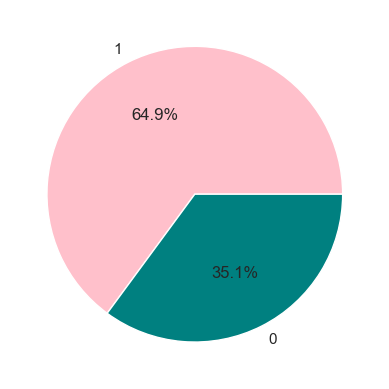

In [12]:
sns.set()
plt.pie(data.Sex.value_counts(),labels=data.Sex.value_counts().index,autopct='%.1f%%',colors=['pink','teal'])
plt.show()

In [13]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data = pd.get_dummies(data,columns=['Pclass'],drop_first=True)
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,False,True,False,True
1,1,0,38.0,1,0,71.2833,False,False,False,False
2,1,0,26.0,0,0,7.9250,False,True,False,True
3,1,0,35.0,1,0,53.1000,False,True,False,False
4,0,1,35.0,0,0,8.0500,False,True,False,True


## **🧠 Logistic Regression Model**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
y=data.iloc[:,0:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [16]:
x=data.iloc[:,1:]
x.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,False,True,False,True
1,0,38.0,1,0,71.2833,False,False,False,False
2,0,26.0,0,0,7.9250,False,True,False,True
3,0,35.0,1,0,53.1000,False,True,False,False
4,1,35.0,0,0,8.0500,False,True,False,True


In [17]:
y.value_counts()

Survived
0           549
1           340
Name: count, dtype: int64

#### Since the majority class(0) != 2*minority classs(1) , we will consider it to be balanced and will not do imbalance treatment

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)
logit=LogisticRegression()
logit.fit(x_train,y_train)

c:\Users\Vidhi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Vidhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_train_pred=logit.predict(x_train)
y_test_pred=logit.predict(x_test)

### **For testing data**

In [20]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print( )
print("Classification Report:", classification_report(y_test, y_test_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Accuracy: 0.8116591928251121

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.90      0.85       136
           1       0.82      0.67      0.73        87

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223


Confusion Matrix:
 [[123  13]
 [ 29  58]]


### **For training data**

In [21]:
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print( )
print("Classification Report:", classification_report(y_train, y_train_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Accuracy: 0.8108108108108109

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.88      0.85       413
           1       0.78      0.70      0.74       253

    accuracy                           0.81       666
   macro avg       0.80      0.79      0.80       666
weighted avg       0.81      0.81      0.81       666


Confusion Matrix:
 [[362  51]
 [ 75 178]]


## **🌲 Random Forest Model**

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=50)
rf.fit(x_train, y_train)

y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)


c:\Users\Vidhi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### **For testing data**

In [23]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print( )
print("Classification Report:", classification_report(y_test, y_test_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Accuracy: 0.7937219730941704

Classification Report:               precision    recall  f1-score   support

           0       0.78      0.91      0.84       136
           1       0.82      0.61      0.70        87

    accuracy                           0.79       223
   macro avg       0.80      0.76      0.77       223
weighted avg       0.80      0.79      0.79       223


Confusion Matrix:
 [[124  12]
 [ 34  53]]


### **For training data**

In [24]:
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print( )
print("Classification Report:", classification_report(y_train, y_train_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Accuracy: 0.9819819819819819

Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       413
           1       0.99      0.96      0.98       253

    accuracy                           0.98       666
   macro avg       0.98      0.98      0.98       666
weighted avg       0.98      0.98      0.98       666


Confusion Matrix:
 [[411   2]
 [ 10 243]]
